# 5. seaborn
* matplotlib를 기반으로 다양한 색상 테마와 통계용 차트 기능을 추가한 시각화 라이브러리
* seaborn에서만 제공되는 통계 기반 plot : countplot, boxplot, violinplot, heatmap
* seaborn은 matplotlib의 컬러 색상보다 컬러가 예쁘게 조합됨 (컬러 팔레트)
* DataFrame으로 되어 있는 데이터를 시각화하는데 유용함
* http://seaborn.pydata.org/
* Color Palettes: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# seaborn에서 제공하는 flights dataseta
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df.shape

(144, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [7]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [8]:
df.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [9]:
df.year.value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

## 5-1. Lineplot
* 선 주변의 옆은 파란색은 데이터의 신뢰구간을 표시
* 1950년대에는 y축 데이터가 약 150 부근에 대부분 몰려있었다면 1960년에는 400~500사이에 분포한 것을 알 수 있음

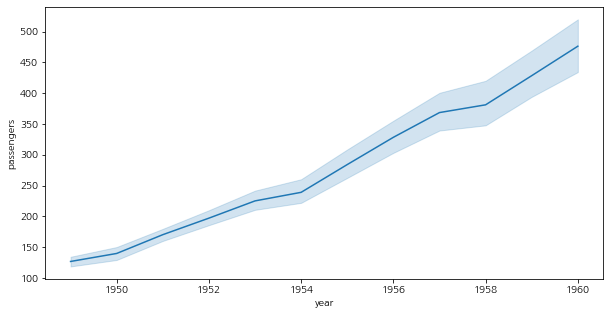

In [10]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='passengers', data=df)
plt.show()

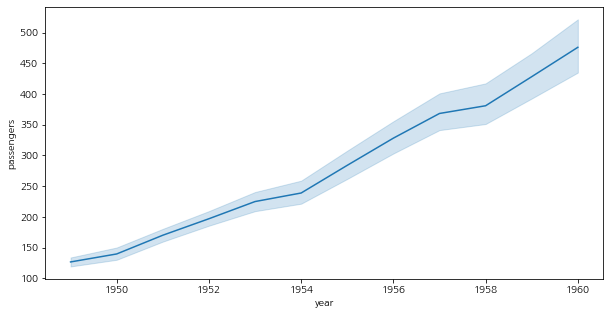

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.year, y=df.passengers)
plt.show()

## 5-2. Scatterplot

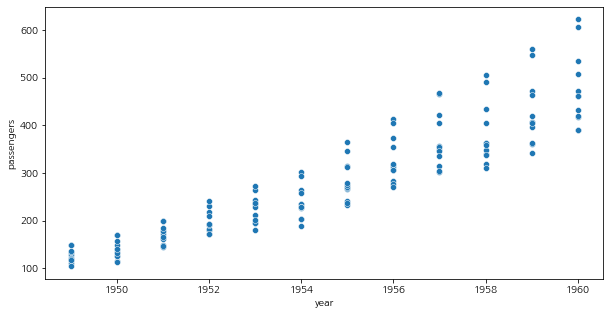

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='year', y='passengers', data=df)
plt.show()

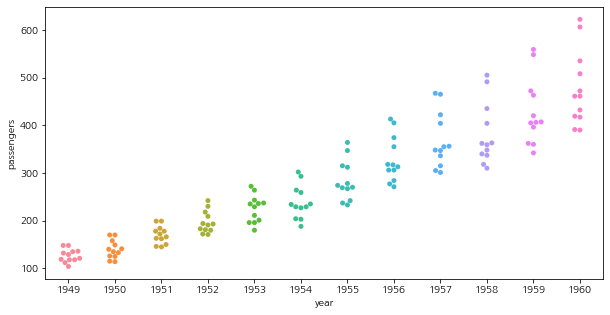

In [13]:
# 겹치지 않게 그려줌
plt.figure(figsize=(10, 5))
sns.swarmplot(x='year', y='passengers', data=df)
plt.show()

## 5-3. Barplot
* barplot은 x 데이터에 대한 y 데이터 평균값을 구함
* 검정색 막대는 편차로 에러바(error bar)라고 함
* 1949년 승객수가 100명인 날도 있고, 120명인 날도 있는데 평균인 110을 기준으로 그래프를 그리게 됨

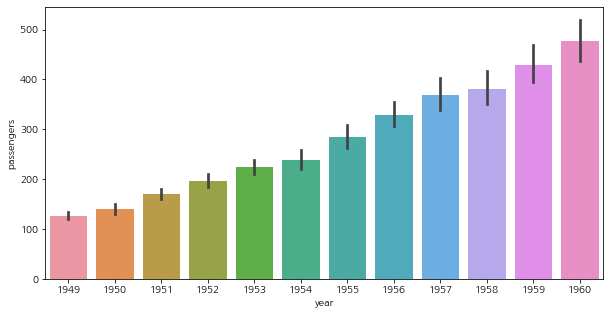

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='passengers', data=df)  # palette='copper'
plt.show()

In [15]:
df.loc[df.year == 1949, 'passengers'].std()

13.720146655281212

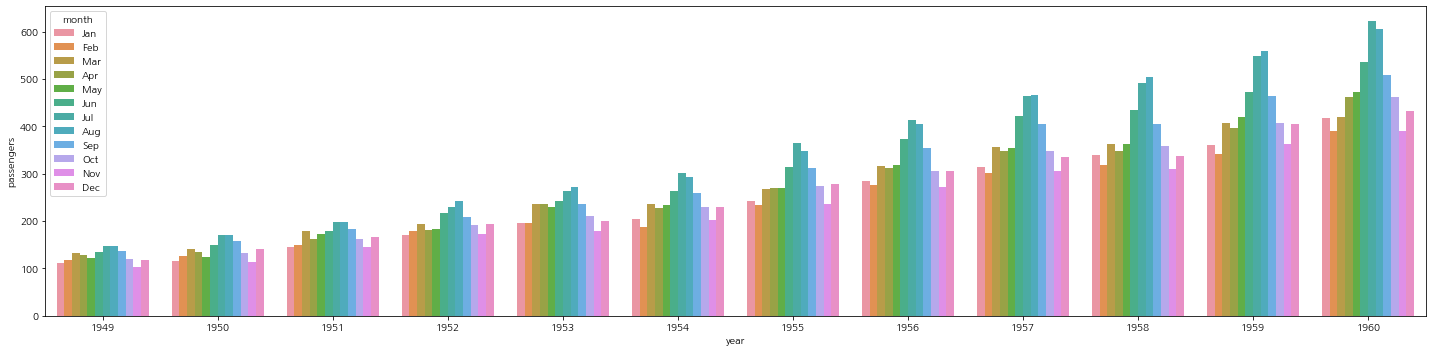

In [16]:
# hue를 지정하면 분류가 한 번 더 들어감
plt.figure(figsize=(20, 5))
sns.barplot(x='year', y='passengers', hue='month', data=df) # palette='copper')
plt.tight_layout()
plt.show()

In [17]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


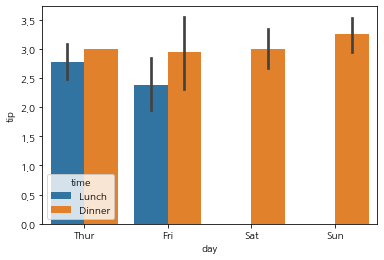

In [18]:
sns.barplot(x='day', y='tip', hue='time', data=tips)
plt.show()

## 5-4. Countplot
* x축 값별로 데이터가 몇개 있는지를 알수 있음

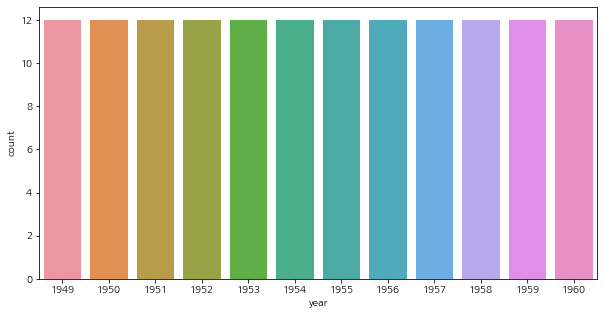

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=df)
plt.show()

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


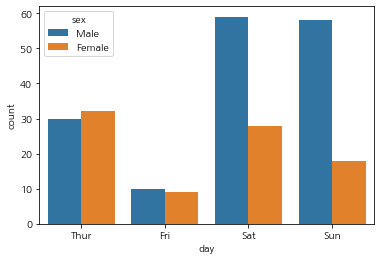

In [21]:
sns.countplot(x='day', hue='sex', data=tips)
plt.show()

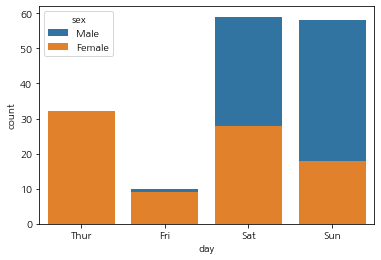

In [22]:
# 누적그래프 그리기
sns.countplot(x='day', hue='sex', dodge=False, data=tips)
plt.show()

## 5-5. Boxplot (box-and-whisker plot)
* barplot은 하나의 평균값으로 표시하지만 boxplot은 데이터의 분포를 확인할 수 있음
* 최소값, 최대값, 중앙값, 1사분위, 3사분위수, 이상치(outlier)를 알 수 있음
* Outlier를 감지하기 위해 많이 사용됨
* 세로선은 이상치를 제외한 가장 높은값과 가장 낮은 값을 나타냄

박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분수의 차이(Q3 - Q1)를 IQR(interquartile range, 사분위수범위)라고 한다.
박스 내부의 가로선은 중앙값을 나타낸다. 박스 외부의 세로선은 1사분위 수보다 1.5 x IQR 만큼 낮은 값과 3사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로
그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이다. 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시한다.

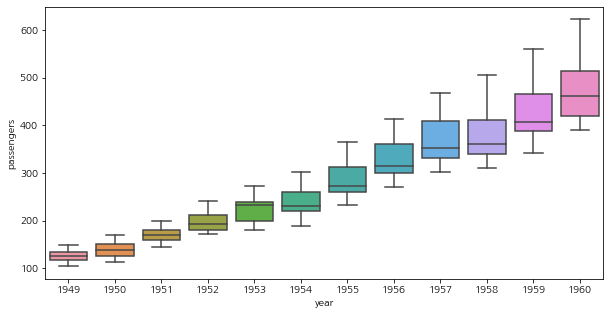

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='passengers', data=df)
plt.show()

In [24]:
df.loc[df.year == 1960].describe()

,year,passengers
count,12.0,12.000000
mean,1960.0,476.166667
std,0.0,77.737125
min,1960.0,390.000000
25%,1960.0,418.500000
50%,1960.0,461.000000
75%,1960.0,514.750000
max,1960.0,622.000000


In [25]:
# IQR(Interquartile Range) = Q3 - Q1
# https://en.wikipedia.org/wiki/Interquartile_range
IQR = 514.75 - 418.5
IQR

96.25

In [26]:
# box plot max값
514.75 + IQR * 1.5

659.125

In [27]:
# box plot min값
418.5 - IQR * 1.5

274.125

In [28]:
# 274.125 ~ 659.125 범위를 벗어난 값은 Outlier(이상치)
# 이상치 만들기
df.loc[132, 'passengers'] = 750
df.loc[df.year == 1960]

,year,month,passengers
132,1960,Jan,750
133,1960,Feb,391
134,1960,Mar,419
135,1960,Apr,461
136,1960,May,472
137,1960,Jun,535
138,1960,Jul,622
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461


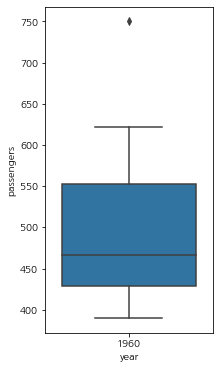

In [29]:
plt.figure(figsize=(3, 6))
sns.boxplot(x='year', y='passengers', data=df[df.year == 1960])
plt.show()

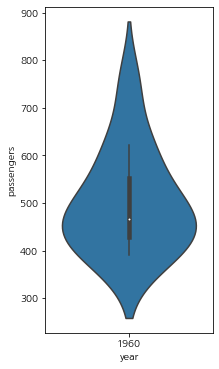

In [30]:
plt.figure(figsize=(3, 6))
sns.violinplot(x='year', y='passengers', data=df[df.year == 1960])
plt.show()

## 5-6. Heatmap
* 값의 변화를 색상표를 통해 알 수 있음

In [31]:
flights = df.pivot_table(index='month', columns='year', values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,750
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


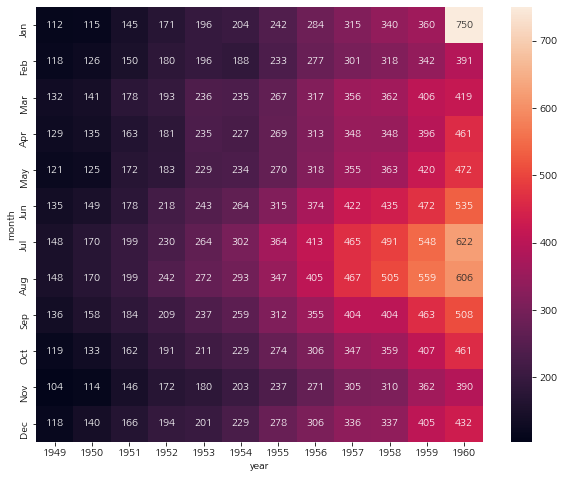

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(flights, annot=True, fmt='d')  # d:정수, f:실수
plt.show()

In [33]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


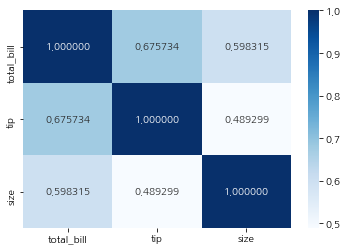

In [37]:
sns.heatmap(tips.corr(), annot=True, fmt='f', cmap='Blues')
plt.show()

<AxesSubplot:>

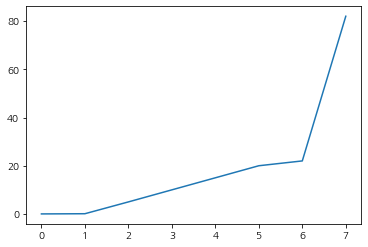

In [35]:
data = [0.02, 0.1, 5, 10, 15, 20, 22, 82]
sns.lineplot(data=data)